In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [6]:
clip1 = VideoFileClip("part1.mp4")

In [7]:
t = clip1.get_frame(0)

In [8]:
t.shape

(720, 1280, 3)

In [37]:
filename = 'scripts/calibrate_camera.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/distortion_correct.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/thresholding.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/full_pipeline.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))


In [38]:
# Get the distortion corrector
mtx, dist = read_camera_calibration('files/camera_calibration.p')
distortion_correcter = CorrectDistortion(mtx, dist)

# Get the lane_extractor
lane_extractor = ExtractLanes(        
        abs_x_sobel_kernel=5, abs_x_thresh=(20, 100),
        abs_y_sobel_kernel=3, abs_y_thresh=(20, 100),
        mag_thresh_sobel_kernel=3, mag_thresh=(30, 100),
        dir_thresh_sobel_kernel=15, dir_thresh=(0.7, 1.3),
        color_s_thresh = (170, 255)
)

In [39]:
frame_processor = ProcessFrame(distortion_correcter, lane_extractor)
def process_image(img):
    try:
        processed_img = frame_processor.run(img)
        return processed_img
    except:
        return img

Automatic pdb calling has been turned ON


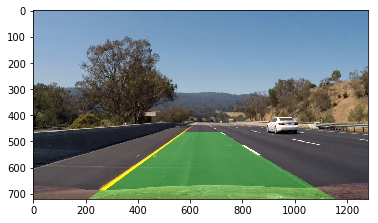

In [41]:
%pdb on
plt.imshow(frame_processor.run(clip1.get_frame(0)))

In [30]:
clip1 = VideoFileClip("project_video.mp4").subclip(20,25)
processed_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

In [13]:
%time processed_clip.write_videofile('temp.mp4', audio=False)

[MoviePy] >>>> Building video temp.mp4
[MoviePy] Writing video temp.mp4


 99%|█████████▉| 125/126 [00:31<00:00,  3.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: temp.mp4 

CPU times: user 28 s, sys: 6.98 s, total: 35 s
Wall time: 33.2 s


In [14]:
from IPython.display import HTML
HTML("""
<video width="900" height="700" controls>
  <source src="{0}">
</video>
""".format('temp.mp4'))